In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
df = pd.read_csv('../output/confidence.csv', header=None)
filenames, confidences = df[0], df[1]

font_path = '/Users/tianxiangsong/Library/Fonts/cambria.ttf'
font_l = FontProperties(fname=font_path, size=36)
font_s = FontProperties(fname=font_path, size=24)

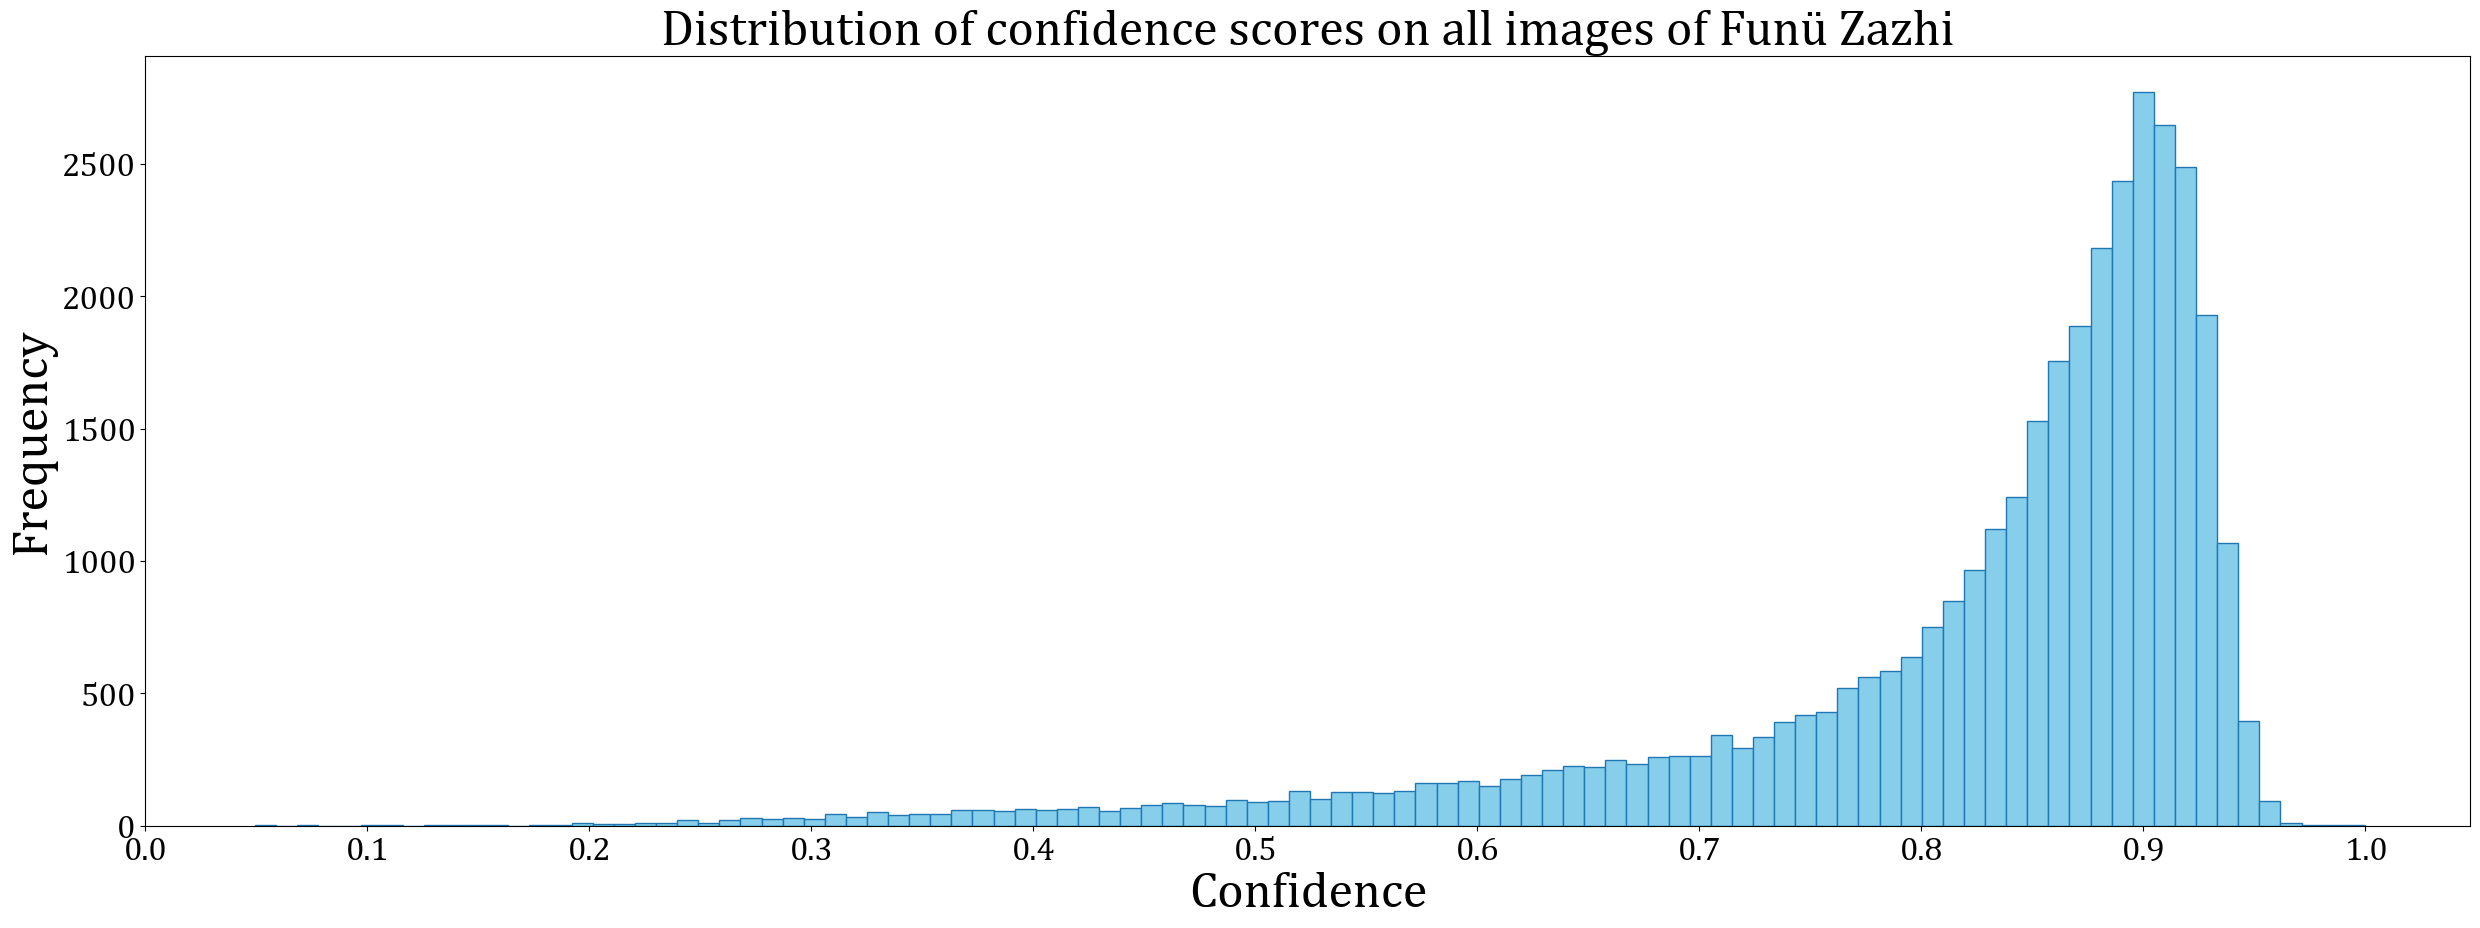

In [3]:
# Plot the distribution of confidence scores
plt.figure(figsize=(30, 10))
plt.hist(confidences, bins=100, color='skyblue', edgecolor='tab:blue')
plt.xlabel('Confidence', fontproperties=font_l)
plt.ylabel('Frequency', fontproperties=font_l)
plt.xticks([i/10 for i in range(11)], fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.title('Distribution of confidence scores on all images of Funü Zazhi', fontproperties=font_l)
plt.show()

In [4]:
# Plot the average confidence scores for each year, where the year is the first 2 digits of the filename
years = ['19'+filename[:2] for filename in filenames]
df_year = pd.DataFrame({'year': years, 'confidence': confidences})
df_year = df_year.groupby('year').mean()

# Plot the average confidence scores for each month
months = ['19' + filename[:2] + '-' + filename[2:4] for filename in filenames]
df_month = pd.DataFrame({'month': months, 'confidence': confidences})
df_month = df_month.groupby('month').mean()

# Convert to datetime
df_year.index = pd.to_datetime(df_year.index)
df_month.index = pd.to_datetime(df_month.index)

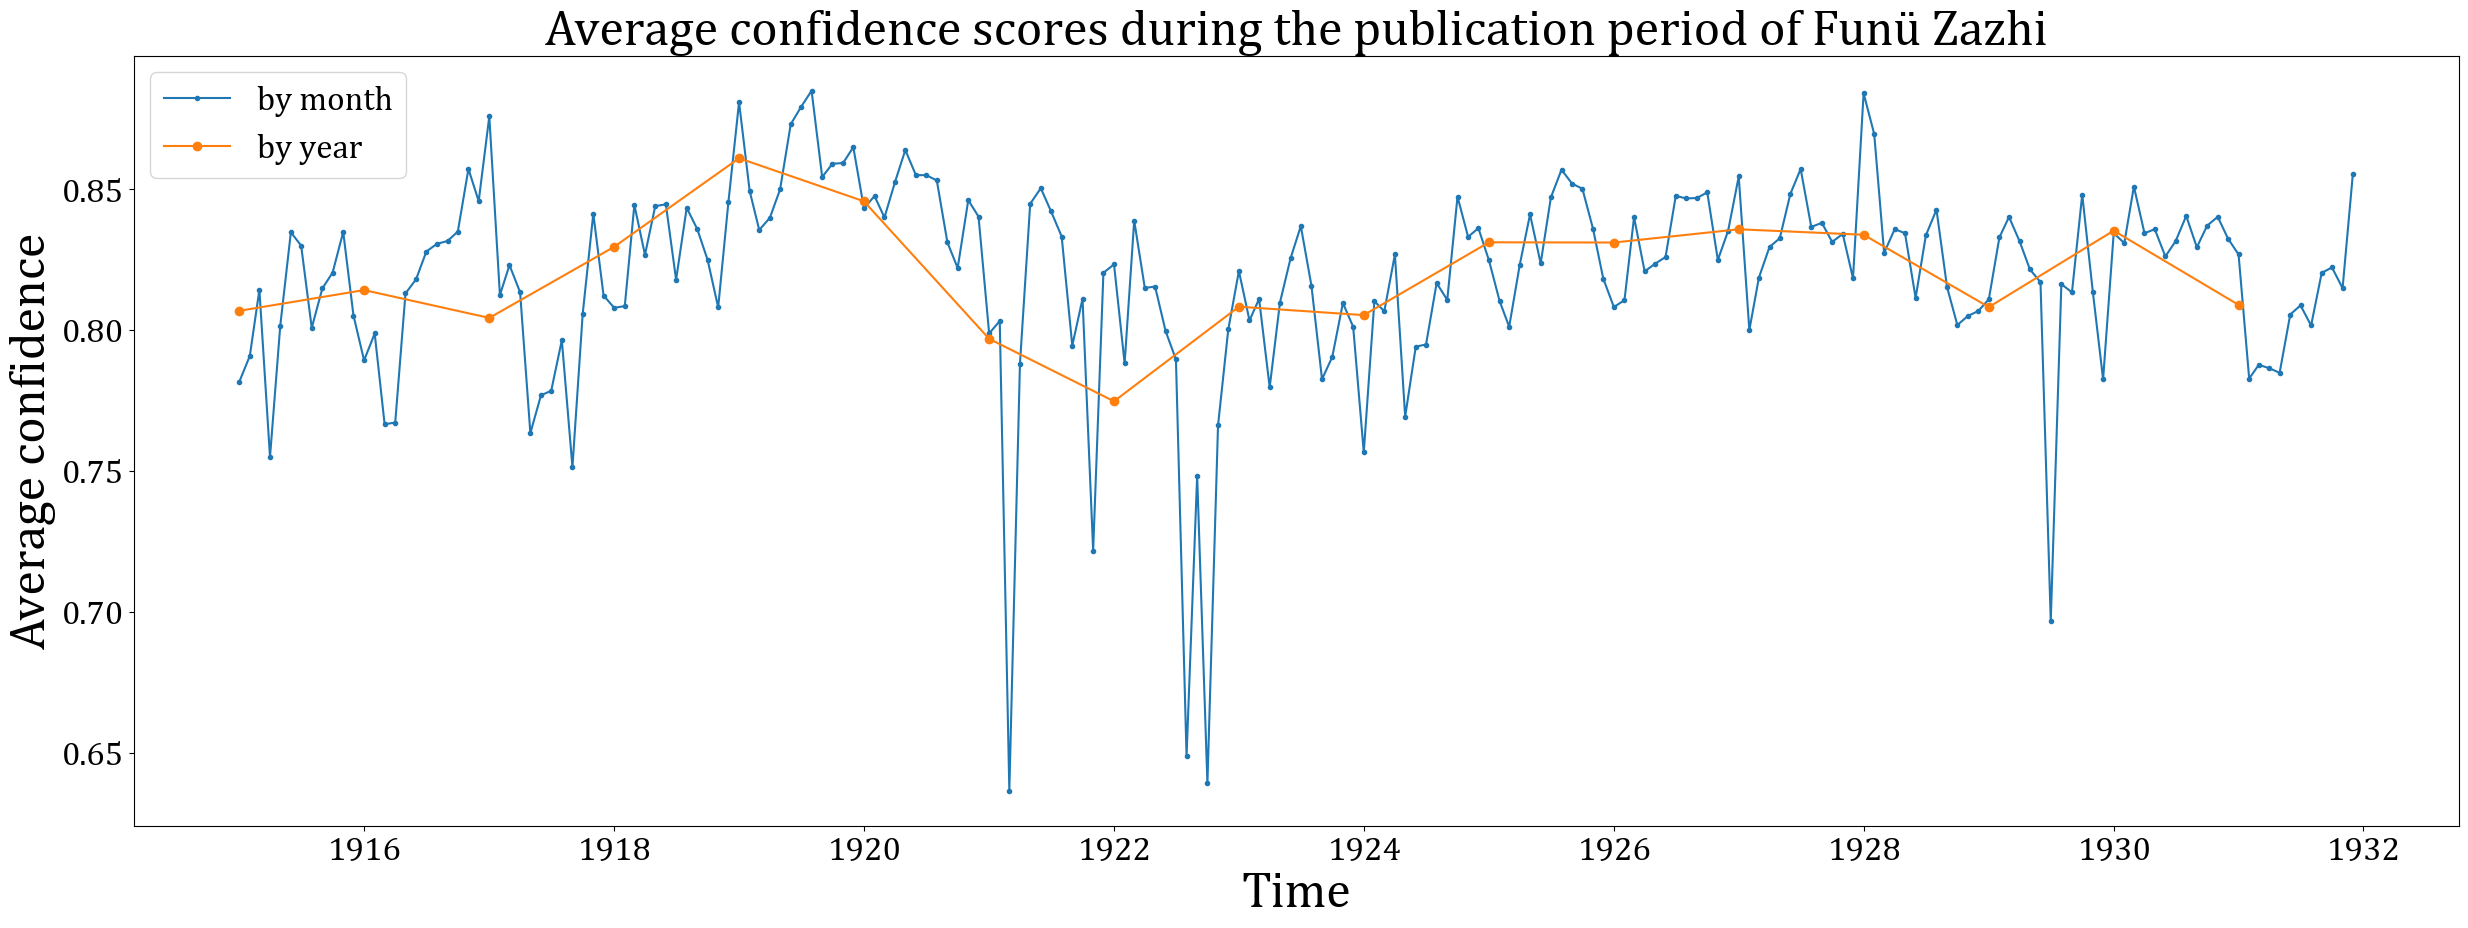

In [6]:
# Display the month plot and year plot on the same figure
plt.figure(figsize=(30, 10))
plt.plot(df_month.index, df_month['confidence'], label='by month', marker='.')
plt.plot(df_year.index, df_year['confidence'], label='by year', marker='o')
plt.xlabel('Time', fontproperties=font_l)
plt.ylabel('Average confidence', fontproperties=font_l)
plt.xticks(fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.title('Average confidence scores during the publication period of Funü Zazhi' , fontproperties=font_l)
plt.legend(prop=font_s)
plt.show()